In [1]:
import tensorflow as tf
from tensorflow import convert_to_tensor, string
from tensorflow.keras.layers import TextVectorization, Embedding, Layer
from tensorflow.data import Dataset
import numpy as np
import matplotlib.pyplot as plt

import nltk, random
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

def func(txt):
    txt=txt.split(',')
    return ' '.join(txt)

In [2]:
def build_sequences(text,  window):
    x = list()
    y = list()
    
    for i in range(len(text)):
        try:
            
            sequence = text[i:i+window]

            target = text[i+1:i+1+window]

            x.append(sequence)
            y.append(target)
            
            
            
        except:
            pass
        
    x = np.array(x)
    y = np.array(y)
    
    return x, y

# Data Loading and Preparation

In [94]:

# topics=pd.read_excel('16dom_.xlsx')[['Dominant_topic','Topic_Keywords']].groupby('Dominant_topic').agg({'Topic_Keywords':'first'}).reset_index()
# topics = topics['Topic_Keywords'].tolist()
# topics_list = []
# for i in topics:
#     topics_list.append(tf.convert_to_tensor((i.split(','))))


In [3]:
topics=pd.read_excel('16dom.xlsx')

topics

,document,Dominant_topic,Topic_Contribution,Topic_Keywords,text
0,0,12,0.463667,"translation,language,machine,system,source,mod...",linguistic input features improve neural machi...
1,1,0,0.574052,"system,model,language,evaluation,score,example...",multiresolution recurrent neural networks appl...
2,2,7,0.391236,"visual,feature,image,network,video,object,mult...",captions visual concepts back hao fang saurabh...
3,3,3,0.567423,"user,item,recommendation,model,matrix,system,m...",deep reinforcement learning recommendations xi...
4,4,13,0.369361,"word,model,text,classiﬁcation,document,sentime...",sentiment classiﬁcation document embeddings tr...
...,...,...,...,...,...
1047,1047,3,0.618639,"user,item,recommendation,model,matrix,system,m...",journal tex class files vol august deepfm wide...
1048,1048,13,0.471496,"word,model,text,classiﬁcation,document,sentime...",funnelling new ensemble method heterogeneous ...
1049,1049,13,0.650212,"word,model,text,classiﬁcation,document,sentime...",published conference paper iclr limmable eural...
1050,1050,0,0.349310,"system,model,language,evaluation,score,example...",effective word order text categorization convo...


In [4]:
topic_contribution={}
topics_df = pd.DataFrame()
for t in topics['Dominant_topic'].unique():
    mean_c=topics[topics['Dominant_topic']==t]['Topic_Contribution'].mean()
    topics[topics['Topic_Contribution']>mean_c]
    topic_contribution[t]=mean_c
    
    topics_df = topics_df.append(topics[(topics['Dominant_topic']==t)&(topics['Topic_Contribution']>mean_c)])
    

In [5]:
topics_df
topics_df['Dominant_topic'].explode().value_counts()

13    88
14    86
0     75
3     42
9     34
12    31
5     30
15    28
11    21
7     19
10    16
1     10
8      6
2      2
4      2
Name: Dominant_topic, dtype: int64

In [6]:
# sns.set_theme()
# plt.plot(topics['Topic_Contribution'])
# plt.title('Topic Contribution')
# plt.ylabel('contribution')
# # plt.legend(['Train loss', 'Valid loss'], loc='upper left')
# plt.show()

In [7]:
def tokenize(text):
    '''a function which convert a given text into tokens'''
    return nltk.word_tokenize(text)


# df = pd.read_excel('train.xlsx')
df = topics_df.copy()
df.columns = ['doc', 'topic', 'Topic_Contribution', 'Topic_Keywords', 'text']
df=df.dropna()
print(df.shape)
df.head()

(486, 5)


,doc,topic,Topic_Contribution,Topic_Keywords,text
0,0,12,0.463667,"translation,language,machine,system,source,mod...",linguistic input features improve neural machi...
14,14,12,0.555811,"translation,language,machine,system,source,mod...",punch positive unlabelled classification retri...
42,42,12,0.492599,"translation,language,machine,system,source,mod...",language models unsupervised multitask learner...
99,99,12,0.619250,"translation,language,machine,system,source,mod...",neural network language modeling features impo...
134,134,12,0.622059,"translation,language,machine,system,source,mod...",towards recommender dialog system qibin chen j...


In [8]:
df['topic'].explode().value_counts()

13    88
14    86
0     73
3     42
9     34
12    31
5     28
15    28
11    21
7     19
10    16
1     10
8      6
2      2
4      2
Name: topic, dtype: int64

# Build sequence to sequence dataset
* x = seq[0:i]
* y = seq[1:i+1]

In [9]:
txtpertpc = df.groupby('topic').agg({'doc': list, 'text': lambda x: ','.join(x), 'Topic_Keywords':'first' 
                                     }).reset_index()

txtpertpc['tokens'] = txtpertpc['text'].apply(lambda x: tokenize(str(x)))
txtpertpc

,topic,doc,text,Topic_Keywords,tokens
0,0,"[1, 40, 51, 52, 57, 95, 126, 139, 144, 167, 18...",multiresolution recurrent neural networks appl...,"system,model,language,evaluation,score,example...","[multiresolution, recurrent, neural, networks,..."
1,1,"[80, 209, 227, 407, 437, 450, 492, 889, 1035, ...",adaptive learning sentiment classiﬁcation ruid...,"model,feature,deep,data,learning,network,layer...","[adaptive, learning, sentiment, classiﬁcation,..."
2,2,"[50, 550]",e uniﬁed toolkit text retrieval analysis sean ...,"latent,variational,vae,inference,log,variable,...","[e, uniﬁed, toolkit, text, retrieval, analysis..."
3,3,"[3, 7, 25, 29, 38, 49, 75, 85, 142, 148, 237, ...",deep reinforcement learning recommendations xi...,"user,item,recommendation,model,matrix,system,m...","[deep, reinforcement, learning, recommendation..."
4,4,"[704, 725]",language model pretraining guillaume lample fa...,"entity,relation,knowledge,graph,embeddings,tri...","[language, model, pretraining, guillaume, lamp..."
5,5,"[24, 55, 68, 83, 88, 183, 218, 232, 249, 265, ...",convolutional neural network language models p...,"word,model,embeddings,vector,language,sentence...","[convolutional, neural, network, language, mod..."
6,7,"[62, 74, 78, 174, 238, 248, 290, 394, 609, 662...",parsing language modeling kook choe brown univ...,"visual,feature,image,network,video,object,mult...","[parsing, language, modeling, kook, choe, brow..."
7,8,"[67, 200, 442, 519, 565, 832]",learning sentence representations via model mu...,"graph,node,tree,edge,structure,walk,parsing,fe...","[learning, sentence, representations, via, mod..."
8,9,"[27, 30, 32, 39, 60, 76, 90, 118, 125, 234, 32...",memory networks personalised recommendation xi...,"algorithm,learning,method,data,training,ˆ,valu...","[memory, networks, personalised, recommendatio..."
9,10,"[66, 94, 159, 236, 325, 372, 418, 435, 451, 68...",published conference paper iclr raternal ropou...,"speech,language,recognition,model,word,system,...","[published, conference, paper, iclr, raternal,..."


In [11]:
x=[]
y=[]


txtpertpc['seqtoseq'] = txtpertpc['tokens'].apply(lambda x : build_sequences(x,10))
txtpertpc

<ipython-input-2-901d0bb8a47c>:20: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.array(x)
<ipython-input-2-901d0bb8a47c>:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y = np.array(y)


,topic,doc,text,Topic_Keywords,tokens,seqtoseq
0,0,"[1, 40, 51, 52, 57, 95, 126, 139, 144, 167, 18...",multiresolution recurrent neural networks appl...,"system,model,language,evaluation,score,example...","[multiresolution, recurrent, neural, networks,...","([[multiresolution, recurrent, neural, network..."
1,1,"[80, 209, 227, 407, 437, 450, 492, 889, 1035, ...",adaptive learning sentiment classiﬁcation ruid...,"model,feature,deep,data,learning,network,layer...","[adaptive, learning, sentiment, classiﬁcation,...","([[adaptive, learning, sentiment, classiﬁcatio..."
2,2,"[50, 550]",e uniﬁed toolkit text retrieval analysis sean ...,"latent,variational,vae,inference,log,variable,...","[e, uniﬁed, toolkit, text, retrieval, analysis...","([[e, uniﬁed, toolkit, text, retrieval, analys..."
3,3,"[3, 7, 25, 29, 38, 49, 75, 85, 142, 148, 237, ...",deep reinforcement learning recommendations xi...,"user,item,recommendation,model,matrix,system,m...","[deep, reinforcement, learning, recommendation...","([[deep, reinforcement, learning, recommendati..."
4,4,"[704, 725]",language model pretraining guillaume lample fa...,"entity,relation,knowledge,graph,embeddings,tri...","[language, model, pretraining, guillaume, lamp...","([[language, model, pretraining, guillaume, la..."
5,5,"[24, 55, 68, 83, 88, 183, 218, 232, 249, 265, ...",convolutional neural network language models p...,"word,model,embeddings,vector,language,sentence...","[convolutional, neural, network, language, mod...","([[convolutional, neural, network, language, m..."
6,7,"[62, 74, 78, 174, 238, 248, 290, 394, 609, 662...",parsing language modeling kook choe brown univ...,"visual,feature,image,network,video,object,mult...","[parsing, language, modeling, kook, choe, brow...","([[parsing, language, modeling, kook, choe, br..."
7,8,"[67, 200, 442, 519, 565, 832]",learning sentence representations via model mu...,"graph,node,tree,edge,structure,walk,parsing,fe...","[learning, sentence, representations, via, mod...","([[learning, sentence, representations, via, m..."
8,9,"[27, 30, 32, 39, 60, 76, 90, 118, 125, 234, 32...",memory networks personalised recommendation xi...,"algorithm,learning,method,data,training,ˆ,valu...","[memory, networks, personalised, recommendatio...","([[memory, networks, personalised, recommendat..."
9,10,"[66, 94, 159, 236, 325, 372, 418, 435, 451, 68...",published conference paper iclr raternal ropou...,"speech,language,recognition,model,word,system,...","[published, conference, paper, iclr, raternal,...","([[published, conference, paper, iclr, raterna..."


# Choose a set from the prepared sequnces

In [13]:
x=[]
y=[]
train_df = pd.DataFrame({'tid':[],'topic':[],'x':[], 'y':[]})
i=0
for i in range(len(txtpertpc)):
 
    train_df=train_df.append(pd.DataFrame({'tid':[i] *len(txtpertpc['seqtoseq'][i][0][200:300]),
            'topic':[txtpertpc['Topic_Keywords'][i]] *len(txtpertpc['seqtoseq'][i][0][200:300]),
            'x':txtpertpc['seqtoseq'][i][0][200:300].tolist(), 
            'y':txtpertpc['seqtoseq'][i][1][200:300].tolist()}))
    
train_df['topic']=train_df['topic'].apply(lambda x: x.split(','))
train_df=train_df.reset_index(drop='index')
print(train_df.shape)
train_df.head()

(1500, 4)


,tid,topic,x,y
0,0.0,"[system, model, language, evaluation, score, e...","[krtalamad, zhou, cifar, senior, fellow, intro...","[zhou, cifar, senior, fellow, introduction, re..."
1,0.0,"[system, model, language, evaluation, score, e...","[zhou, cifar, senior, fellow, introduction, re...","[cifar, senior, fellow, introduction, recurren..."
2,0.0,"[system, model, language, evaluation, score, e...","[cifar, senior, fellow, introduction, recurren...","[senior, fellow, introduction, recurrent, neur..."
3,0.0,"[system, model, language, evaluation, score, e...","[senior, fellow, introduction, recurrent, neur...","[fellow, introduction, recurrent, neural, netw..."
4,0.0,"[system, model, language, evaluation, score, e...","[fellow, introduction, recurrent, neural, netw...","[introduction, recurrent, neural, networks, rn..."


In [ ]:
train_df['x'][0]

In [ ]:
train_df['y'][0]

In [12]:
# train_df['x'] = train_df['x'].apply(lambda x : ' '.join([t for t in x]))
# train_df['y'] = train_df['y'].apply(lambda x : ' '.join([t for t in x]))
# train_df['topic']=train_df['topic'].apply(func)
# train_df

# Vocabulary calculation and preparation
* get all vocabulary (total unique words in corpus)
* assign each word to id
* assign each word to a vector by one-hot encoding

In [101]:
vocab = np.append(train_df['x'].explode().unique(), train_df['y'].explode().unique())
vocab = list(set(np.append(vocab, train_df['topic'].explode().unique())))
len(vocab)

1006

## Create Dictionary ...

In [104]:
# id to word and word to id
id2vocab = {idx:label for idx, label in enumerate(vocab)}
vocab2id = {label:idx for idx, label in enumerate(vocab)}

# vector for each word by one-hot encoding
total_vocab_one_hot_dict = {}
for v in vocab:
    total_vocab_one_hot_dict[v] = [0]*len(vocab)
    total_vocab_one_hot_dict[v][vocab2id[v]]=1 


In [105]:
def binarize(list_txt):
    return [total_vocab_one_hot_dict[i] for i in list_txt]

def list2ids(list_txt):
    return [vocab2id[i] for i in list_txt]


## update sequances with on-hot and ids codes ...

In [106]:
train_df['one_hot_x'] = train_df['x'].apply(lambda x: binarize(x))
train_df['one_hot_y'] = train_df['y'].apply(lambda x: binarize(x))
train_df['one_hot_topic'] = train_df['topic'].apply(lambda x: binarize(x))

In [107]:
train_df['id_word_x'] = train_df['x'].apply(lambda x: list2ids(x))
train_df['id_word_y'] = train_df['y'].apply(lambda x: list2ids(x))
train_df['id_word_topic'] = train_df['topic'].apply(lambda x: list2ids(x))

In [108]:
print(train_df.shape)
train_df.head()

(1500, 10)


,tid,topic,x,y,one_hot_x,one_hot_y,one_hot_topic,id_word_x,id_word_y,id_word_topic
0,0.0,"[system, model, language, evaluation, score, e...","[krtalamad, zhou, cifar, senior, fellow, intro...","[zhou, cifar, senior, fellow, introduction, re...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[614, 632, 686, 489, 301, 608, 418, 794, 664, ...","[632, 686, 489, 301, 608, 418, 794, 664, 699, ...","[722, 270, 755, 327, 757, 10, 399, 249, 3, 920]"
1,0.0,"[system, model, language, evaluation, score, e...","[zhou, cifar, senior, fellow, introduction, re...","[cifar, senior, fellow, introduction, recurren...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[632, 686, 489, 301, 608, 418, 794, 664, 699, ...","[686, 489, 301, 608, 418, 794, 664, 699, 785, ...","[722, 270, 755, 327, 757, 10, 399, 249, 3, 920]"
2,0.0,"[system, model, language, evaluation, score, e...","[cifar, senior, fellow, introduction, recurren...","[senior, fellow, introduction, recurrent, neur...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[686, 489, 301, 608, 418, 794, 664, 699, 785, ...","[489, 301, 608, 418, 794, 664, 699, 785, 830, ...","[722, 270, 755, 327, 757, 10, 399, 249, 3, 920]"
3,0.0,"[system, model, language, evaluation, score, e...","[senior, fellow, introduction, recurrent, neur...","[fellow, introduction, recurrent, neural, netw...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[489, 301, 608, 418, 794, 664, 699, 785, 830, ...","[301, 608, 418, 794, 664, 699, 785, 830, 900, ...","[722, 270, 755, 327, 757, 10, 399, 249, 3, 920]"
4,0.0,"[system, model, language, evaluation, score, e...","[fellow, introduction, recurrent, neural, netw...","[introduction, recurrent, neural, networks, rn...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[301, 608, 418, 794, 664, 699, 785, 830, 900, ...","[608, 418, 794, 664, 699, 785, 830, 900, 450, ...","[722, 270, 755, 327, 757, 10, 399, 249, 3, 920]"


# Dataset splitting - 

In [109]:
training=pd.DataFrame()
testing=pd.DataFrame()
for i in range(16):
    training=training.append(train_df[train_df['tid']==i].head(80))
    testing=testing.append(train_df[train_df['tid']==i].head(20))

In [110]:

# train_size = 0.75
# train_df = train_df.sample(frac=1)

train_dataset=training

testing = testing.sample(frac=1)

# training dataset
train_dataset = train_dataset.reset_index(drop=True)

# validation dataset
val_dataset = testing.sample(frac=0.4,random_state=200)

# test dataset
test_dataset = testing.drop(val_dataset.index).reset_index(drop=True)


print("FULL Dataset: {}".format(train_df.shape))
print("TRAIN Dataset: {}".format(train_dataset.shape))
print("VALIDATION Dataset: {}".format(val_dataset.shape))
print("TEST Dataset: {}".format(test_dataset.shape))

FULL Dataset: (1500, 10)
TRAIN Dataset: (1200, 10)
VALIDATION Dataset: (120, 10)
TEST Dataset: (180, 10)


# Modeling

## Token-Position-Topic Embeddings

In [111]:
max_len=10
class TokenPositionTopicEmbedding(layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super(TokenPositionTopicEmbedding, self).__init__()
        self.token_emb = layers.Embedding(input_dim=vocab_size,
                                          output_dim=embed_dim)
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)
        
        self.topic_emb = layers.Embedding(input_dim=vocab_size,
                                          output_dim=embed_dim)
        
        
    def call(self, x, topic):
        # calculate embedding for tokens with their positions, and topic
        positions = tf.range(start=0, limit=max_len, delta=1)
        positions = self.pos_emb(positions)
        
        x = self.token_emb(x)
        
        topic_emb = self.topic_emb(topic)
        
        return x + positions + topic_emb

## Transformer Block (multi-head attention)

In [112]:


class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads,
                                             key_dim=embed_dim)
        self.ffn = keras.Sequential([
            layers.Dense(ff_dim, activation="relu"),
            layers.Dense(embed_dim),
        ])
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)  # attention layer
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)  # layer norm
        
        ffn_output = self.ffn(out1)  #feed-forward layer
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)  # layer norm






## Build Full Model ...

In [114]:
def get_model(embed_dim, num_heads, ff_dim, max_len, keywords_len):
    
    # input sequence
    input_seq = layers.Input(shape=(max_len, ))
    # input topic number
    input_topic = layers.Input(shape=(keywords_len, ))

    # find embeddings 
    embedding = TokenPositionTopicEmbedding(max_len, vocab_size, embed_dim)(input_seq, input_topic)
    
    # use a number of stracked transformer blocks 
    x = TransformerBlock(embed_dim, num_heads, ff_dim)(embedding)
    x = TransformerBlock(embed_dim, num_heads, ff_dim)(x)
    x = TransformerBlock(embed_dim, num_heads, ff_dim)(x)
    x = TransformerBlock(embed_dim, num_heads, ff_dim)(x)
    x = TransformerBlock(embed_dim, num_heads, ff_dim)(x)
    x = TransformerBlock(embed_dim, num_heads, ff_dim)(x)
    
    # dense layer with ReLu activation
    x = layers.Dense(ff_dim, activation='relu', name='Dense_ReLu1')(x)
    
    # softmax layer to predict sequences
    output = layers.Dense(vocab_size, activation='softmax', name='Dense_Softmax')(x)
    
    # model with its inputs and outputs
    model = tf.keras.Model(inputs=[input_seq, input_topic], outputs=output)

    return model

In [115]:
embed_dim = 256  # Embedding size for each token
num_heads = 10  # Number of attention heads
ff_dim = 80  # Hidden layer size in feed forward network inside transformer
max_len = 10
keywords_len = 10
vocab_size = len(vocab)

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)
loss = tf.keras.losses.categorical_crossentropy

model = get_model(embed_dim, num_heads, ff_dim, max_len, keywords_len)
model.compile(optimizer=optimizer, loss=loss, metrics='accuracy', run_eagerly=True)



In [116]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 10)]         0           []                               
                                                                                                  
 input_8 (InputLayer)           [(None, 10)]         0           []                               
                                                                                                  
 token_position_topic_embedding  (None, 10, 256)     517632      ['input_7[0][0]',                
 _3 (TokenPositionTopicEmbeddin                                   'input_8[0][0]']                
 g)                                                                                               
                                                                                            

# Training ...

In [117]:
input_seq =  train_dataset['id_word_x'].tolist()
input_seq = np.array(input_seq, dtype=np.int32)

y_train = np.array(train_dataset['one_hot_y'].tolist(), dtype=np.int32)

val_input_seq =  val_dataset['id_word_x'].tolist()
val_input_seq = np.array(val_input_seq, dtype=np.int32)

y_val = np.array(val_dataset['one_hot_y'].tolist(), dtype=np.int32)


input_topic = train_dataset['id_word_topic'].tolist()
input_topic = np.array(input_topic, dtype=np.int32)

val_input_topic = val_dataset['id_word_topic'].tolist()
val_input_topic = np.array(val_input_topic, dtype=np.int32)

In [125]:
train_loss = []
val_loss = []
val_acc = []
train_acc = []

# with tf.device('/GPU:0'):
for epoch in range(20):
    print(f'==== EPOCH = {epoch} ==================================================')

    # train model using train dataset
    history = model.fit( [input_seq,input_topic], y_train, epochs= 1, verbose=1, batch_size=64)   

    train_acc.append(history.history['accuracy'][0])
    train_loss.append(history.history['loss'][0]) 


    # prediction and validation     
    y_pred = model.predict([val_input_seq, val_input_topic], verbose=1)
    # validation loss 
    val_loss.append(np.array(loss( y_val, y_pred)).mean()) 

    true=[np.argmax(y_pred[i][-1]) for i in range(len(y_pred[i]))]
    pred=[np.argmax(y_val[i][-1]) for i in range(len(y_pred[i]))]
    total=0
    val_acc.append(sum([(true[i]==pred[i]) for i in range(len(pred))])/len(pred))
    print('validation accuracy: ', val_acc[-1])


    print(f'==========================================================================\n')

==== EPOCH = 0 ==================================================
4/4 [==============================] - 2s 437ms/step
validation accuracy:  0.0

==== EPOCH = 1 ==================================================
4/4 [==============================] - 2s 502ms/step
validation accuracy:  0.0

==== EPOCH = 2 ==================================================
4/4 [==============================] - 2s 432ms/step
validation accuracy:  0.0

==== EPOCH = 3 ==================================================
4/4 [==============================] - 2s 492ms/step
validation accuracy:  0.0

==== EPOCH = 4 ==================================================
4/4 [==============================] - 2s 435ms/step
validation accuracy:  0.0

==== EPOCH = 5 ==================================================
4/4 [==============================] - 2s 452ms/step
validation accuracy:  0.0

==== EPOCH = 6 ==================================================
4/4 [==============================] - 2s 439ms/step
valid

In [126]:
for epoch in range(20):
    print(f'==== EPOCH = {epoch} ==================================================')

    # train model using train dataset
    history = model.fit( [input_seq,input_topic], y_train, epochs= 1, verbose=1, batch_size=32)   

    train_acc.append(history.history['accuracy'][0])
    train_loss.append(history.history['loss'][0]) 


    # prediction and validation     
    y_pred = model.predict([val_input_seq, val_input_topic], verbose=1)
    # validation loss 
    val_loss.append(np.array(loss( y_val, y_pred)).mean()) 

    true=[np.argmax(y_pred[i][-1]) for i in range(len(y_pred[i]))]
    pred=[np.argmax(y_val[i][-1]) for i in range(len(y_pred[i]))]
    total=0
    val_acc.append(sum([(true[i]==pred[i]) for i in range(len(pred))])/len(pred))
    print('validation accuracy: ', val_acc[-1])


    print(f'==========================================================================\n')

==== EPOCH = 0 ==================================================
4/4 [==============================] - 1s 319ms/step
validation accuracy:  0.1

==== EPOCH = 1 ==================================================
4/4 [==============================] - 1s 302ms/step
validation accuracy:  0.1

==== EPOCH = 2 ==================================================
4/4 [==============================] - 1s 294ms/step
validation accuracy:  0.1

==== EPOCH = 3 ==================================================
4/4 [==============================] - 1s 323ms/step
validation accuracy:  0.1

==== EPOCH = 4 ==================================================
4/4 [==============================] - 1s 326ms/step
validation accuracy:  0.1

==== EPOCH = 5 ==================================================
4/4 [==============================] - 1s 335ms/step
validation accuracy:  0.1

==== EPOCH = 6 ==================================================
4/4 [==============================] - 2s 380ms/step
valid

In [138]:
for epoch in range(40):
    print(f'==== EPOCH = {epoch} ==================================================')

    # train model using train dataset
    history = model.fit( [input_seq,input_topic], y_train, epochs= 1, verbose=1, batch_size=16)   

    train_acc.append(history.history['accuracy'][0])
    train_loss.append(history.history['loss'][0]) 


    # prediction and validation     
    y_pred = model.predict([val_input_seq, val_input_topic], verbose=1)
    # validation loss 
    val_loss.append(np.array(loss( y_val, y_pred)).mean()) 

    true=[np.argmax(y_pred[i][-1]) for i in range(len(y_pred))]
    pred=[np.argmax(y_val[i][-1]) for i in range(len(y_pred))]
    total=0
    val_acc.append(sum([(true[i]==pred[i]) for i in range(len(pred))])/len(pred))
    print('validation accuracy: ', val_acc[-1])


    print(f'==========================================================================\n')

==== EPOCH = 0 ==================================================
4/4 [==============================] - 1s 174ms/step
validation accuracy:  0.1

==== EPOCH = 1 ==================================================
4/4 [==============================] - 1s 242ms/step
validation accuracy:  0.1

==== EPOCH = 2 ==================================================
4/4 [==============================] - 1s 174ms/step
validation accuracy:  0.1

==== EPOCH = 3 ==================================================
4/4 [==============================] - 1s 187ms/step
validation accuracy:  0.3

==== EPOCH = 4 ==================================================
4/4 [==============================] - 1s 230ms/step
validation accuracy:  0.3

==== EPOCH = 5 ==================================================
4/4 [==============================] - 1s 260ms/step
validation accuracy:  0.3

==== EPOCH = 6 ==================================================
4/4 [==============================] - 1s 261ms/step
valid

4/4 [==============================] - 1s 179ms/step
validation accuracy:  0.5

==== EPOCH = 27 ==================================================
4/4 [==============================] - 1s 175ms/step
validation accuracy:  0.5

==== EPOCH = 28 ==================================================
4/4 [==============================] - 1s 201ms/step
validation accuracy:  0.5

==== EPOCH = 29 ==================================================
4/4 [==============================] - 1s 167ms/step
validation accuracy:  0.8

==== EPOCH = 30 ==================================================
4/4 [==============================] - 1s 180ms/step
validation accuracy:  0.7

==== EPOCH = 31 ==================================================
4/4 [==============================] - 1s 187ms/step
validation accuracy:  0.7

==== EPOCH = 32 ==================================================
4/4 [==============================] - 1s 204ms/step
validation accuracy:  0.8

==== EPOCH = 33 ======================

In [141]:
for epoch in range(5):
    print(f'==== EPOCH = {epoch} ==================================================')

    # train model using train dataset
    history = model.fit( [input_seq,input_topic], y_train, epochs= 1, verbose=1, batch_size=16)   

    train_acc.append(history.history['accuracy'][0])
    train_loss.append(history.history['loss'][0]) 


    # prediction and validation     
    y_pred = model.predict([val_input_seq, val_input_topic], verbose=1)
    # validation loss 
    val_loss.append(np.array(loss( y_val, y_pred)).mean()) 

    true=[np.argmax(y_pred[i][-1]) for i in range(len(y_pred))]
    pred=[np.argmax(y_val[i][-1]) for i in range(len(y_pred))]
    total=0
    val_acc.append(sum([(true[i]==pred[i]) for i in range(len(pred))])/len(pred))
    print('validation accuracy: ', val_acc[-1])


    print(f'==========================================================================\n')

==== EPOCH = 0 ==================================================
4/4 [==============================] - 1s 166ms/step
validation accuracy:  0.8

==== EPOCH = 1 ==================================================
4/4 [==============================] - 1s 191ms/step
validation accuracy:  0.9

==== EPOCH = 2 ==================================================
4/4 [==============================] - 1s 168ms/step
validation accuracy:  1.0

==== EPOCH = 3 ==================================================
4/4 [==============================] - 1s 175ms/step
validation accuracy:  1.0

==== EPOCH = 4 ==================================================
4/4 [==============================] - 1s 166ms/step
validation accuracy:  1.0



In [216]:
for epoch in range(5):
    print(f'==== EPOCH = {epoch} ==================================================')

    # train model using train dataset
    history = model.fit( [input_seq,input_topic], y_train, epochs= 1, verbose=1, batch_size=16)   

    train_acc.append(history.history['accuracy'][0])
    train_loss.append(history.history['loss'][0]) 


    # prediction and validation     
    y_pred = model.predict([val_input_seq, val_input_topic], verbose=1)
    # validation loss 
    val_loss.append(np.array(loss( y_val, y_pred)).mean()) 

    true=[np.argmax(y_pred[i][-1]) for i in range(len(y_pred))]
    pred=[np.argmax(y_val[i][-1]) for i in range(len(y_pred))]
    total=0
    val_acc.append(sum([(true[i]==pred[i]) for i in range(len(pred))])/len(pred))
    print('validation accuracy: ', val_acc[-1])


    print(f'==========================================================================\n')

==== EPOCH = 0 ==================================================
4/4 [==============================] - 1s 175ms/step
validation accuracy:  0.9

==== EPOCH = 1 ==================================================
4/4 [==============================] - 1s 175ms/step
validation accuracy:  0.9

==== EPOCH = 2 ==================================================
4/4 [==============================] - 1s 289ms/step
validation accuracy:  0.9083333333333333

==== EPOCH = 3 ==================================================
4/4 [==============================] - 1s 181ms/step
validation accuracy:  0.9083333333333333

==== EPOCH = 4 ==================================================
4/4 [==============================] - 1s 196ms/step
validation accuracy:  0.9083333333333333



In [222]:
for epoch in range(5):
    print(f'==== EPOCH = {epoch} ==================================================')

    # train model using train dataset
    history = model.fit( [input_seq,input_topic], y_train, epochs= 1, verbose=1, batch_size=16)   

    train_acc.append(history.history['accuracy'][0])
    train_loss.append(history.history['loss'][0]) 


    # prediction and validation     
    y_pred = model.predict([val_input_seq, val_input_topic], verbose=1)
    # validation loss 
    val_loss.append(np.array(loss( y_val, y_pred)).mean()) 

    true=[np.argmax(y_pred[i][-1]) for i in range(len(y_pred))]
    pred=[np.argmax(y_val[i][-1]) for i in range(len(y_pred))]
    total=0
    val_acc.append(sum([(true[i]==pred[i]) for i in range(len(pred))])/len(pred))
    print('validation accuracy: ', val_acc[-1])


    print(f'==========================================================================\n')

==== EPOCH = 0 ==================================================
4/4 [==============================] - 1s 184ms/step
validation accuracy:  0.9166666666666666

==== EPOCH = 1 ==================================================
4/4 [==============================] - 1s 184ms/step
validation accuracy:  0.925

==== EPOCH = 2 ==================================================
4/4 [==============================] - 1s 173ms/step
validation accuracy:  0.9333333333333333

==== EPOCH = 3 ==================================================
4/4 [==============================] - 1s 174ms/step
validation accuracy:  0.9333333333333333

==== EPOCH = 4 ==================================================
4/4 [==============================] - 1s 174ms/step
validation accuracy:  0.9333333333333333



## Validation and Training Accuracy & Loss

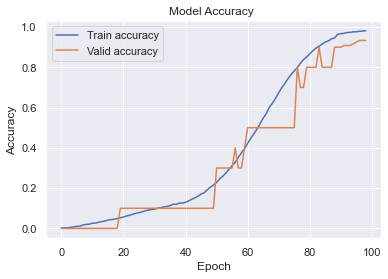

In [251]:

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()
plt.plot(train_acc)
plt.plot(val_acc)
plt.title('Model Accuracy ')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train accuracy', 'Valid accuracy'], loc='upper left')
plt.show()

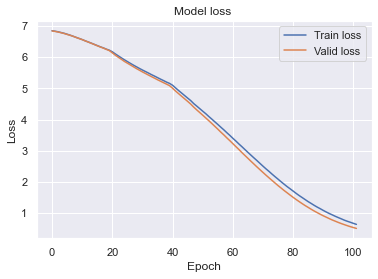

In [259]:

sns.set_theme()
plt.plot(train_loss)
plt.plot(val_loss)
plt.title('Model loss ')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train loss', 'Valid loss'], loc='upper right')
plt.show()

# Save model ...

In [253]:
model.save_weights('/Users/ghadeeraboalrob/ghadeer/transformer_model/txt_generation_v1.h5')

# Testing ...

In [144]:
test_input_seq =  test_dataset['id_word_x'].tolist()
test_input_seq = np.array(test_input_seq, dtype=np.int32)

y_test = np.array(test_dataset['one_hot_y'].tolist(), dtype=np.int32)

test_input_topic = test_dataset['id_word_topic'].tolist()
test_input_topic = np.array(test_input_topic, dtype=np.int32)

In [224]:

y_=model.predict([test_input_seq, test_input_topic],verbose=1)

6/6 [==============================] - 1s 179ms/step


## Metrics

In [225]:
from sklearn.metrics import precision_recall_fscore_support

true=[np.argmax(y_[i][-1]) for i in range(len(y_))]
pred=[np.argmax(y_test[i][-1]) for i in range(len(y_))]
total=0
print(f'Accuracy: {round(100*(sum([(true[i]==pred[i]) for i in range(len(pred))])/len(pred)),2)}%\n')

prf = precision_recall_fscore_support(true, pred, average='macro')
print('Macro metrics:')
print(f'Precision: {round(prf[0]*100,2)}\nRecall: {round(prf[0]*100,2)}%\nF score: {round(prf[0]*100,2)}%\n')
prf = precision_recall_fscore_support(true, pred, average='micro')
print('Micro metrics:')
print(f'Precision: {round(prf[0]*100,2)}\nRecall: {round(prf[0]*100,2)}%\nF score: {round(prf[0]*100,2)}%\n')

Accuracy: 95.0%

Macro metrics:
Precision: 92.81
Recall: 92.81%
F score: 92.81%

Micro metrics:
Precision: 95.0
Recall: 95.0%
F score: 95.0%



/Users/ghadeeraboalrob/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ghadeeraboalrob/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Evaluation using semantic approach (cosine similarity)

In [185]:
from gensim.models import Word2Vec
from scipy import spatial

class Evaluation:
    def __init__(self, embed_dim=256, tokens=None):
        self.embed_dim = embed_dim
        self.embedding_generator(tokens)
        
        
    def embedding_generator(self, tokens):
        self.w2v_model = Word2Vec(tokens,
                     min_count=1, # min frequency of a word, ignore words with frequency lower than min_count
                     window=10, # maximum distance between the current and predicted word within a sentence
                     vector_size=256, # Dimensionality of the result vector
                     alpha=0.03, # learning rate
                     min_alpha=0.0006, # learning rate will drop during training linearly by min_alpha 
                     workers = 4, # worker threads to train the model
                     seed = 42 # random number generator
                    )

    
    
    def get_seq_embeddings(self, seq):
        embed=np.array([0]*self.embed_dim)
        for i in seq:
            embed=embed+ self.w2v_model.wv[i]
        return embed
        
    def cal_similarity(self, txt1, txt2, n_grams):
        
        seq1=txt1.split(' ')
        seq2=txt2.split(' ')
        
        embed1=self.get_seq_embeddings(seq1[-1*n_grams:])
        embed2=self.get_seq_embeddings(seq2[-1*n_grams:])
        
        return 1-spatial.distance.cosine(embed1, embed2)
    
    
    def evaluate(self, df, n_grams):
        return df.apply(lambda x: self.cal_similarity(x['y'], x['_y'], n_grams,), axis=1).mean()
        
        
    
    

In [162]:
tokens=topics['text'].apply(lambda x: tokenize(str(x)))

In [186]:
evaluation_obj = Evaluation(256, tokens)

In [226]:
pred=[id2vocab[np.argmax(y_[i][-1])] for i in range(len(y_))]
true=[id2vocab[np.argmax(y_test[i][-1])] for i in range(len(y_))]

test_txt=[]
for i in test_input_seq:
    test_txt.append([id2vocab[idx] for idx in i ])
    
true_data=[]
pred_data=[]
for i in range(len(test_txt)):
    pred_data.append(' '.join([t for t in test_txt[i]])+' '+pred[i])
    true_data.append(' '.join([t for t in test_txt[i]])+' '+true[i])
    

In [256]:
d=pd.DataFrame({'y':true_data[:100], '_y':pred_data[:100]})
print(f'Similarity over 4 grams: {round(evaluation_obj.evaluate(d, 4)*100, 2)}%')
print(f'Similarity over 3 grams: {round(evaluation_obj.evaluate(d, 3)*100, 2)}%')
print(f'Similarity over 1 gram: {round(evaluation_obj.evaluate(d, 1)*100, 2)}%')

Similarity over 4 grams: 99.57%
Similarity over 3 grams: 99.38%
Similarity over 1 gram: 95.76%


# combine LDA with text generation model

In [201]:
topic16 = topics['Topic_Keywords'].unique()
TOPICS={}
for t in range(len(topic16)):
    TOPICS[t] = topic16[t].split(',')

## Load LDA model with dictionary

In [213]:
from gensim.corpora import Dictionary
from gensim import corpora, models, similarities

texts = [[]]
dictionary = Dictionary(texts)
loaded_dict=dictionary.load(r'/Users/ghadeeraboalrob/ghadeer/models/dict.h5')
lda_model =  models.LdaModel.load(f'/Users/ghadeeraboalrob/ghadeer/models/lda_topic_modeling_16_fv.h5')

## Get topic using LDA

In [215]:
text = "been caused by water hammer pressure because effect example sentence spans and target label for each task ontonotes winograd to cast all tasks into common classication model we focus on the labeling versions of each task spans gold mentions constituents predicates etc are given as inputs and the model is trained to predict as multilabel target we note that this is only one component of the common pipelined or endtoend approach to these tasks and that in general our metrics are not comparable to models that jointly perform span identication and labeling however since our focus is on analysis rather than application the labeling version is better for our goals of isolating individual phenomena of interest and giving uniform metric binary score across our probing suite asks our experiments focus on eight core nlp labeling tasks partofspeech constituents dependencies named entities semantic roles"
new_doc = text.split(" ")
new_doc_bow = loaded_dict.doc2bow(new_doc)
top_topics = lda_model.get_document_topics(new_doc_bow)


max_topic = top_topics[np.argmax(np.array(top_topics).T[1])][0]
print(f"the relevant topic is {max_topic}")

## prepare sequence for text and topic 

In [ ]:
seq = new_doc
seq=seq[-10:]
# convert words to ids based on our dictionary
seq = list2ids(seq)

# get topic keywords
topic_seq = TOPICS[max_topic]
# convert words to ids based on our dictionary
topic_seq = list2ids(topic_seq)

# convert sequences into numpy arrays
seq=np.array(seq, dtype=np.int32)
topic_seq=np.array(topic_seq, dtype=np.int32)

## Predict next ...

In [ ]:
next_w=model.predict([seq, topic_seq],verbose=1)

## Decode results ...

In [ ]:
next_pred=[id2vocab[np.argmax(next_w[i][-1])] for i in range(len(next_w))]


new_txt=[]
for i in seq:
    new_txt.append([id2vocab[idx] for idx in i ])
    
data=[]
for i in range(len(new_txt)):
    data.append(' '.join([t for t in new_txt[i]])+' '+next_pred[i])
    

In [ ]:
data

# End of Notebook